In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


In [15]:
training_data = np.load('TF_intro.npz')

In [16]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 28.0087
Epoch 2/100
1000/1000 - 0s - loss: 4.4964
Epoch 3/100
1000/1000 - 0s - loss: 1.4736
Epoch 4/100
1000/1000 - 0s - loss: 0.6697
Epoch 5/100
1000/1000 - 0s - loss: 0.4373
Epoch 6/100
1000/1000 - 0s - loss: 0.3739
Epoch 7/100
1000/1000 - 0s - loss: 0.3482
Epoch 8/100
1000/1000 - 0s - loss: 0.3564
Epoch 9/100
1000/1000 - 0s - loss: 0.3525
Epoch 10/100
1000/1000 - 0s - loss: 0.3457
Epoch 11/100
1000/1000 - 0s - loss: 0.3466
Epoch 12/100
1000/1000 - 0s - loss: 0.3459
Epoch 13/100
1000/1000 - 0s - loss: 0.3510
Epoch 14/100
1000/1000 - 0s - loss: 0.3478
Epoch 15/100
1000/1000 - 0s - loss: 0.3448
Epoch 16/100
1000/1000 - 0s - loss: 0.3494
Epoch 17/100
1000/1000 - 0s - loss: 0.3472
Epoch 18/100
1000/1000 - 0s - loss: 0.3411
Epoch 19/100
1000/1000 - 0s - loss: 0.3506
Epoch 20/100
1000/1000 - 0s - loss: 0.3452
Epoch 21/100
1000/1000 - 0s - loss: 0.3475
Epoch 22/100
1000/1000 - 0s - loss: 0.3397
Epoch 23/100
1000/1000 - 0s - loss: 0.34

In [17]:
model.layers[0].get_weights()

[array([[ 2.0252635],
        [-3.0235353]], dtype=float32), array([4.995255], dtype=float32)]

In [18]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0252635],
       [-3.0235353]], dtype=float32)

In [19]:
bias = model.layers[0].get_weights()[1]
bias

array([4.995255], dtype=float32)

In [20]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: id=13639, shape=(1000, 1), dtype=float32, numpy=
array([[-1.83889923e+01],
       [-4.19991255e+00],
       [ 1.91598053e+01],
       [-1.73897648e+00],
       [-9.89786720e+00],
       [ 5.44002008e+00],
       [-3.26394691e+01],
       [ 3.11132374e+01],
       [ 3.19930611e+01],
       [-2.25698109e+01],
       [ 1.94792500e+01],
       [ 2.53209076e+01],
       [-2.33288288e-01],
       [ 2.31035385e+01],
       [-2.03285675e+01],
       [ 1.58530006e+01],
       [-1.55541611e+01],
       [-2.16837521e+01],
       [ 1.57118359e+01],
       [-1.69891491e+01],
       [ 1.40007839e+01],
       [ 2.96772022e+01],
       [ 1.12919722e+01],
       [ 3.06146336e+00],
       [ 2.95685310e+01],
       [ 6.60513926e+00],
       [ 4.84611559e+00],
       [-2.01810970e+01],
       [ 2.50567551e+01],
       [-6.96896124e+00],
       [-8.08090401e+00],
       [ 1.49249306e+01],
       [ 6.60904551e+00],
       [ 2.05055408e+01],
       [-4.85683775e+00],
       [ 1.89413242e+01],
   

In [21]:
training_data['targets'].round(1)

array([[-18.4],
       [ -5.2],
       [ 18.6],
       [ -2. ],
       [-10. ],
       [  4.6],
       [-32.3],
       [ 30.5],
       [ 30.8],
       [-22.7],
       [ 19.6],
       [ 25.6],
       [ -0.8],
       [ 22.4],
       [-19.9],
       [ 16.5],
       [-15.3],
       [-21.9],
       [ 16.5],
       [-17.2],
       [ 13.3],
       [ 28.6],
       [ 11.3],
       [  2.7],
       [ 29.6],
       [  6. ],
       [  3.9],
       [-20.4],
       [ 23.9],
       [ -7.6],
       [ -7.9],
       [ 15.8],
       [  5.9],
       [ 19.4],
       [ -4.2],
       [ 18.7],
       [-26.1],
       [-34.5],
       [-12.2],
       [ 41.2],
       [  6.3],
       [-17.7],
       [ -0.8],
       [-18.6],
       [-28.7],
       [-18. ],
       [-22.7],
       [ -6.4],
       [ 15.6],
       [-17.9],
       [ -4.8],
       [ -7. ],
       [ 15. ],
       [-18.5],
       [ -6.6],
       [ 35.4],
       [ -4. ],
       [ 19. ],
       [  4.2],
       [  3.6],
       [-19.4],
       [ -1.1],
       [

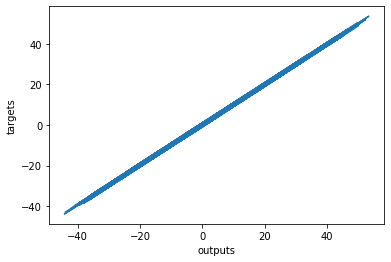

In [22]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Initializer weights and bias

In [25]:
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer,loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 36.8369
Epoch 2/100
1000/1000 - 0s - loss: 1.1474
Epoch 3/100
1000/1000 - 0s - loss: 0.4198
Epoch 4/100
1000/1000 - 0s - loss: 0.3918
Epoch 5/100
1000/1000 - 0s - loss: 0.4096
Epoch 6/100
1000/1000 - 0s - loss: 0.3814
Epoch 7/100
1000/1000 - 0s - loss: 0.4185
Epoch 8/100
1000/1000 - 0s - loss: 0.3752
Epoch 9/100
1000/1000 - 0s - loss: 0.3818
Epoch 10/100
1000/1000 - 0s - loss: 0.3694
Epoch 11/100
1000/1000 - 0s - loss: 0.3910
Epoch 12/100
1000/1000 - 0s - loss: 0.3921
Epoch 13/100
1000/1000 - 0s - loss: 0.3836
Epoch 14/100
1000/1000 - 0s - loss: 0.4028
Epoch 15/100
1000/1000 - 0s - loss: 0.3767
Epoch 16/100
1000/1000 - 0s - loss: 0.3753
Epoch 17/100
1000/1000 - 0s - loss: 0.4007
Epoch 18/100
1000/1000 - 0s - loss: 0.3926
Epoch 19/100
1000/1000 - 0s - loss: 0.3767
Epoch 20/100
1000/1000 - 0s - loss: 0.3766
Epoch 21/100
1000/1000 - 0s - loss: 0.4029
Epoch 22/100
1000/1000 - 0s - loss: 0.3908
Epoch 23/100
1000/1000 - 0s - loss: 0.36

In [26]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.994136 ],
       [-2.9480705]], dtype=float32)

In [27]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9909143], dtype=float32)